In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [926]:
#read data

#df = pd.read_excel('Data ML New Strain.xlsx')
df = pd.read_excel('ML Data Non Wireless.xlsx')
df[0:5]

,Num Category,Category,Time,R/R0,R/R0 1
0,1,Finger,0.128,1.00000,0.94129
1,1,Finger,0.320,0.99998,1.33073
2,1,Finger,0.511,1.04770,1.50291
3,1,Finger,0.703,1.06931,1.53018
4,1,Finger,0.895,1.23086,1.55011


In [790]:
#read how many colomns are in the category
df['Category'].value_counts()

Category
Finger     331
Touch      192
Writing    148
Push Up     98
Name: count, dtype: int64

In [560]:
#read how many colomns & rows are in the data
df.shape

(584, 4)

In [562]:
#describe the data mathematically
df.describe()

,Num Category,Times (sec),R/R0
count,584.000000,584.000000,584.000000
mean,2.525685,12.804308,2.017843
std,1.136947,7.284384,1.187122
min,1.000000,0.128000,0.927260
25%,1.750000,6.548000,1.058265
50%,3.000000,12.818000,1.499470
75%,4.000000,18.990000,2.983308
max,4.000000,27.301000,4.979290


In [564]:
#check the data if there are any empty data / empty columns
df.isnull().sum()

Num Category    0
Category        0
Times (sec)     0
R/R0            0
dtype: int64

In [445]:
#check the data if there are any duplicate data
df.duplicated().sum()

0

In [250]:
#df['R/R0'].drop_duplicates().sum()
#df['R/R0'].duplicated().sum()

In [447]:
#check the data again
df.head()

,Category,Times (sec),Strain 50%,Strain 100%,Strain 150%,Strain 200%
0,Fast Stretching Cycles,0.128,1.00000,1.00000,1.00000,1.00000
1,Fast Stretching Cycles,0.336,0.98540,1.00092,1.00014,1.00070
2,Fast Stretching Cycles,0.528,0.93557,1.10017,1.00008,1.01065
3,Fast Stretching Cycles,0.720,0.92807,1.53746,1.00023,1.02886
4,Fast Stretching Cycles,0.912,0.96292,2.10525,0.99965,1.21656


In [928]:
#divide the data into 2, which are x and y
#read how many colomns & rows are in the data x & y

#x = df[['Strain 1','Strain 2','Strain 3','Strain 4','Strain 5','Strain 6','Strain 7','Strain 8','Strain 9','Strain 10','Strain 11','Strain 12','Strain 13','Strain 14','Strain 15','Strain 16']]
#x = df[['Strain 50%','Strain 100%','Strain 150%','Strain 200%']]
x=df[['R/R0','R/R0 1']]
y = df['Category']

print("X : ", x.shape)
print("Y : ", y.shape)

X :  (769, 2)
Y :  (769,)


In [720]:
x_test = np.array(x_test)

n_classes = len(np.unique(x_test))

# Maka ukuran confusion matrix adalah:
matrix_size = (n_classes, n_classes)
print("Ukuran confusion matrix:", matrix_size)

Ukuran confusion matrix: (1059, 1059)


In [930]:
#divide the data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [932]:
#check how many colomns & rows are in the data x_train, x_test, y_train, y_test
print(f"x_train : ({x_train.shape})")
print(f"x_test : ({x_test.shape})")
print(f"y_train : ({y_train.shape})")
print(f"y_test : ({y_test.shape})")

x_train : ((538, 2))
x_test : ((231, 2))
y_train : ((538,))
y_test : ((231,))


In [934]:
#predict the accuracy of the data using KNN classification
knn = KNeighborsClassifier(n_neighbors=5)
x_train = x_train.fillna(0)
knn.fit(x_train, y_train)

x_test = x_test.fillna(0)
y_pred = knn.predict(x_test)
KNN_accuracy = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('KNN accuracy : {:.2f}%'.format(KNN_accuracy*100))

              precision    recall  f1-score   support

      Finger       1.00      0.97      0.99       106
     Push Up       0.90      0.70      0.79        27
       Touch       0.95      1.00      0.97        57
     Writing       0.83      0.95      0.89        41

    accuracy                           0.94       231
   macro avg       0.92      0.91      0.91       231
weighted avg       0.95      0.94      0.94       231

KNN accuracy : 94.37%


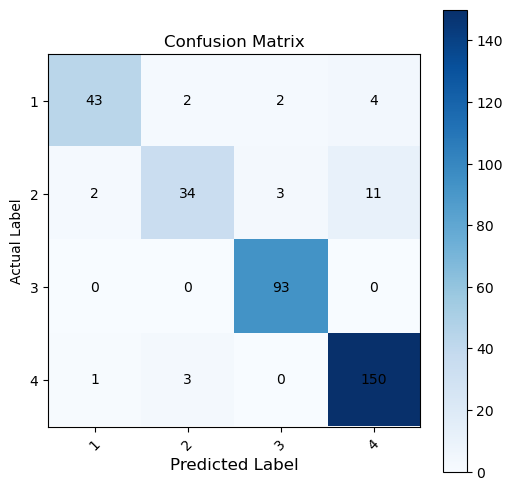

In [766]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y))), np.unique(y), rotation = 45)
plt.yticks(np.arange(len(np.unique(y))), np.unique(y))
plt.xlabel('Predicted Label', fontsize = 12)
plt.ylabel('Actual Label')
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
plt.show()

[[0.97169811 0.         0.02830189 0.        ]
 [0.         0.7037037  0.         0.2962963 ]
 [0.         0.         1.         0.        ]
 [0.         0.04878049 0.         0.95121951]]


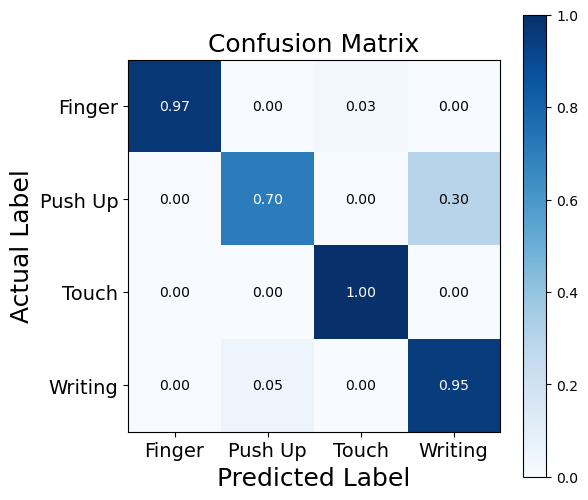

In [938]:
#from sklearn import svm
#clf = svm.SVC(kernel='rbf')
#clf.fit(x_train, y_train) 
#
#y_hat = clf.predict(x_test)

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred, normalize='true')  # Normalize the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

print(cm)

# Visualize the normalized confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y))), np.unique(y), fontsize=14)
plt.yticks(np.arange(len(np.unique(y))), np.unique(y), fontsize=14)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('Actual Label', fontsize=18)

# Display normalized values in the confusion matrix
thresh = cm.max() / 2.
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        plt.text(j, i, f"{cm[i, j]:.2f}", ha='center', va='center', color="white" if cm[i, j] > thresh else "black")

plt.show()

Normalized confusion matrix
[[0.97169811 0.         0.02830189 0.        ]
 [0.         0.7037037  0.         0.2962963 ]
 [0.         0.         1.         0.        ]
 [0.         0.04878049 0.         0.95121951]]


<Figure size 640x480 with 0 Axes>

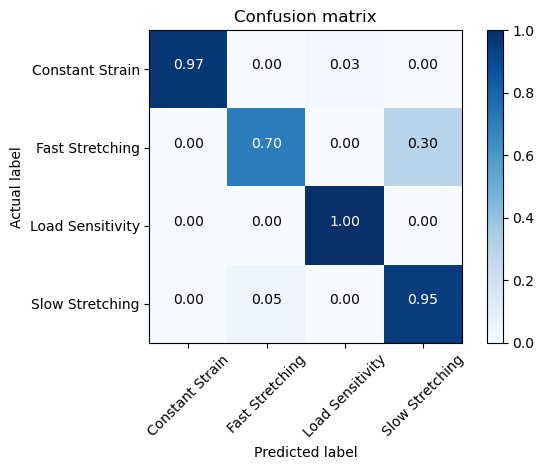

In [816]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

yhat = clf.predict(x_test)

# Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, yhat)
# np.set_printoptions(precision=2)

# print (classification_report(y_test, yhat))

# plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=['Category'],normalize= False,  title='Confusion matrix')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Assuming you have the true labels (y_true) and the predicted labels (y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes =['Constant Strain','Fast Stretching','Load Sensitivity','Slow Stretching'], normalize=True, title='Confusion matrix')